<a href="https://colab.research.google.com/github/jihopark-blue/studyingisfun/blob/main/%ED%86%B5%EA%B3%84%ED%95%99%EA%B0%9C%EB%A1%A0_2%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R 패키지

## ggplot2 패키지
- Wilkinson의 The grammar of graphics의 원칙에 따라 그래프를 만들 수 있는 함수들의 모음
- 기본 구조에 레이어를 추가하는 방식으로 원하는 그래프의 형태를 지정
- 디테일을 상세하게 지정하지 않아도 자동으로 예쁜 그래프를 그려줌

## ggplot2 이용하여 그래프 그리기
- 기본 형태
    ```
    ggplot(data = <data>) +
        <GEOM_FUNCTION> (mapping = aes(<MAPPINGS>))
    ```
- `ggplot()` 은 먼저 자료의 좌표축을 만듦
- `geom function`은 mapping = aes() 구문을 통해 x축과 y축 변수를 지정
- 그래프의 종류에 따라 다른 geom function을 사용
- 주의: "+"는 항상 라인의 마지막에 위치해야 함


## 교재 예제 2-3의 막대그래프

In [6]:
library(ggplot2)   # load
library(forcats)

transp <- c('bicycle', 'bus', 'bus', 'walking', 'bus', 'bicycle', 'bicycle',
            'bus', 'bus', 'bus', 'bicycle', 'bus', 'bicycle', 'bicycle', 'walking',
            'bus', 'bus', 'bicycle', 'bicycle', 'walking', 'walking',
            'bicycle', 'bus', 'bus', 'bus', 'bus', 'bicycle',
            'bus', 'bus', 'bicycle', 'bicycle', 'bicycle')

dat1 <- data.frame(transp)

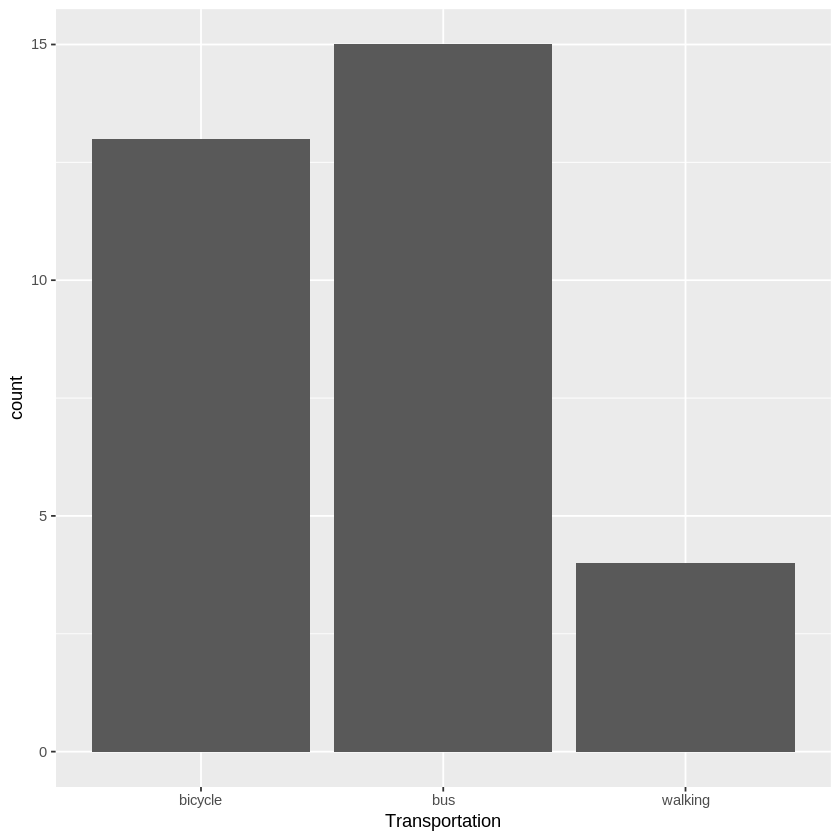

In [9]:
ggplot(data=dat1) + geom_bar(mapping=aes(x=transp)) + xlab("Transportation")

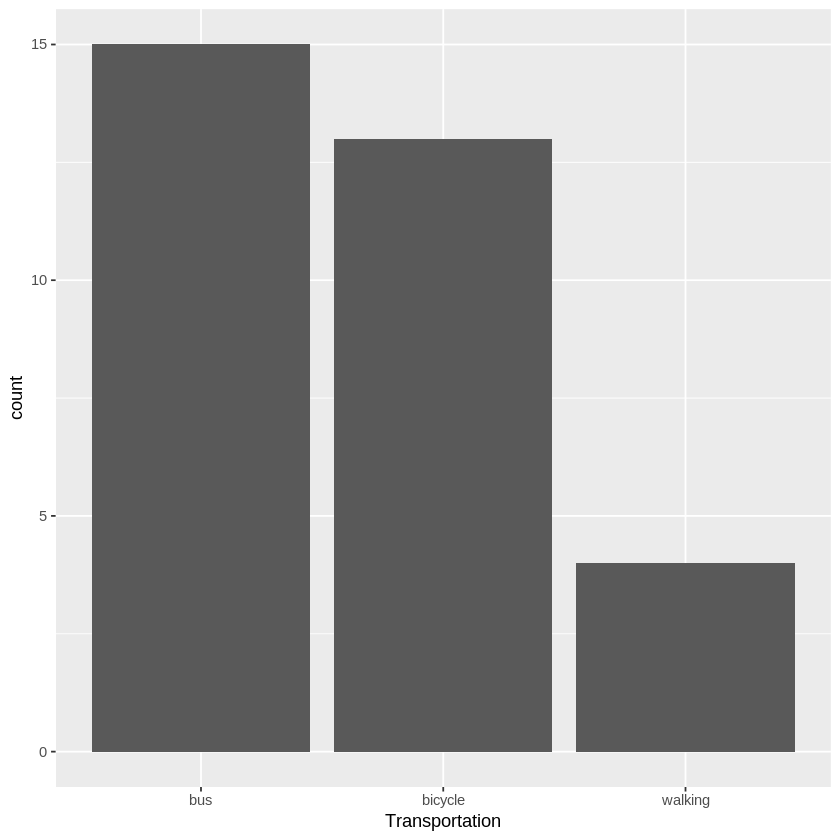

In [10]:
ggplot(data=dat1) + geom_bar(mapping=aes(x=fct_infreq(transp))) +
  xlab("Transportation")

## 교재 예제 2-4의 막대그래프

In [11]:
obesity <- factor(c('underweight', 'normal', 'overweight', 'obese'),
                levels=c('underweight', 'normal', 'overweight', 'obese'))
count <- c(6, 69, 27, 13)
perc <- count/sum(count)*100
dat2 <- data.frame(obesity, count, perc)

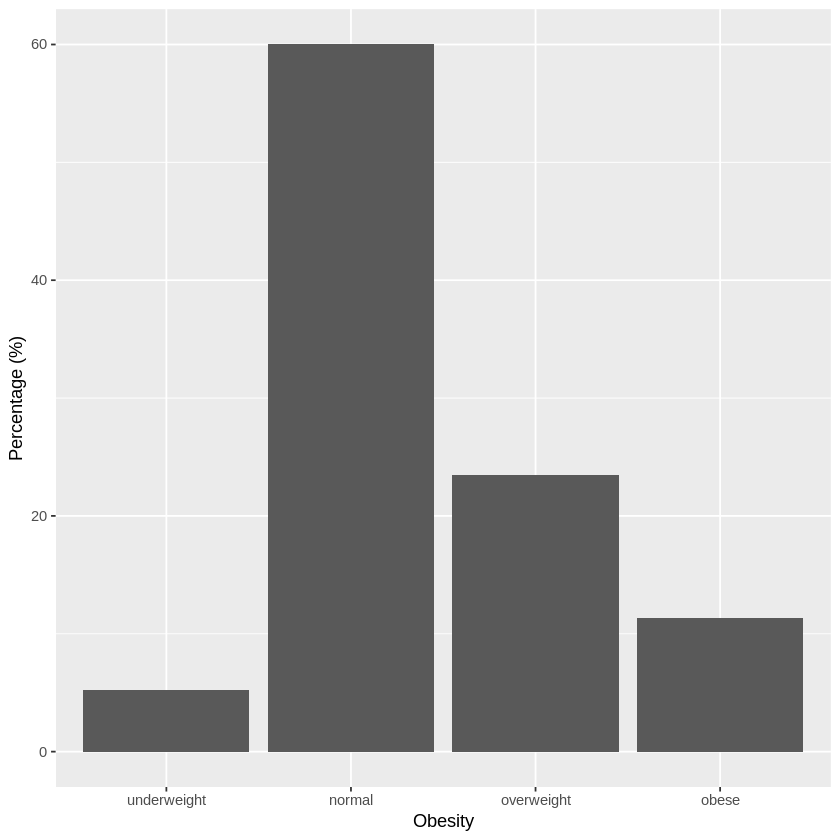

In [12]:
ggplot(data=dat2) + geom_bar(mapping=aes(x=obesity, y=perc),
    stat='identity') + xlab('Obesity') + ylab('Percentage (%)')

## 교재 예제 2-5의 원그래프

In [13]:
table(transp)

transp
bicycle     bus walking 
     13      15       4 

In [15]:
dat3 <- data.frame(transportation=c('bus', 'bicycle', 'walking'), count=c(15, 13, 4))

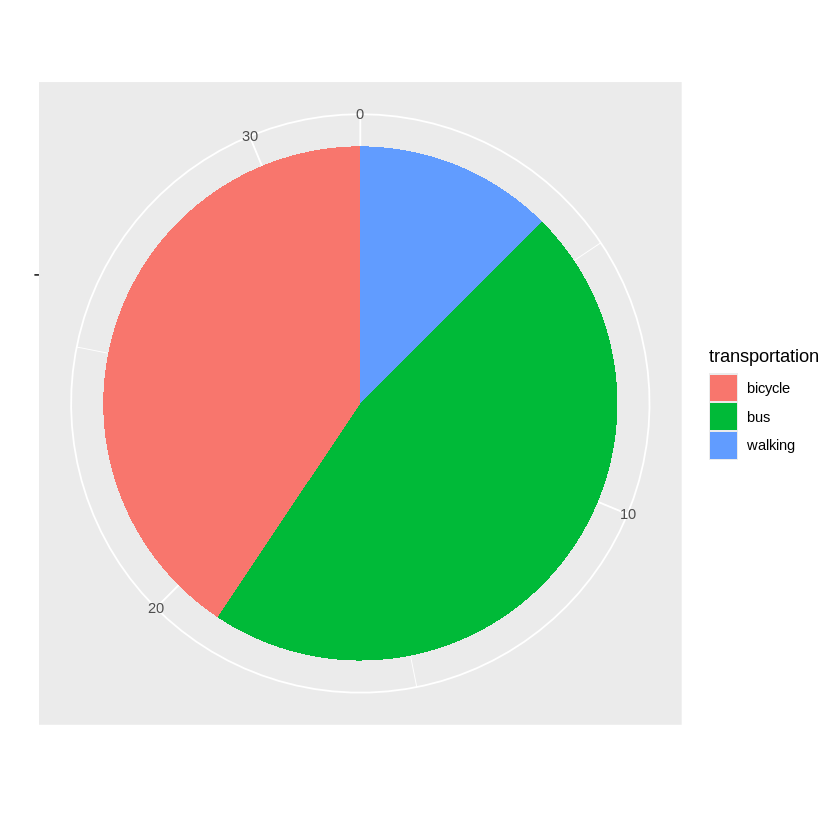

In [16]:
ggplot(data=dat3) + geom_bar(mapping=aes(x='', y=count, fill=transportation),
    stat='identity') +
      coord_polar('y', start=0) + xlab('') + ylab('')

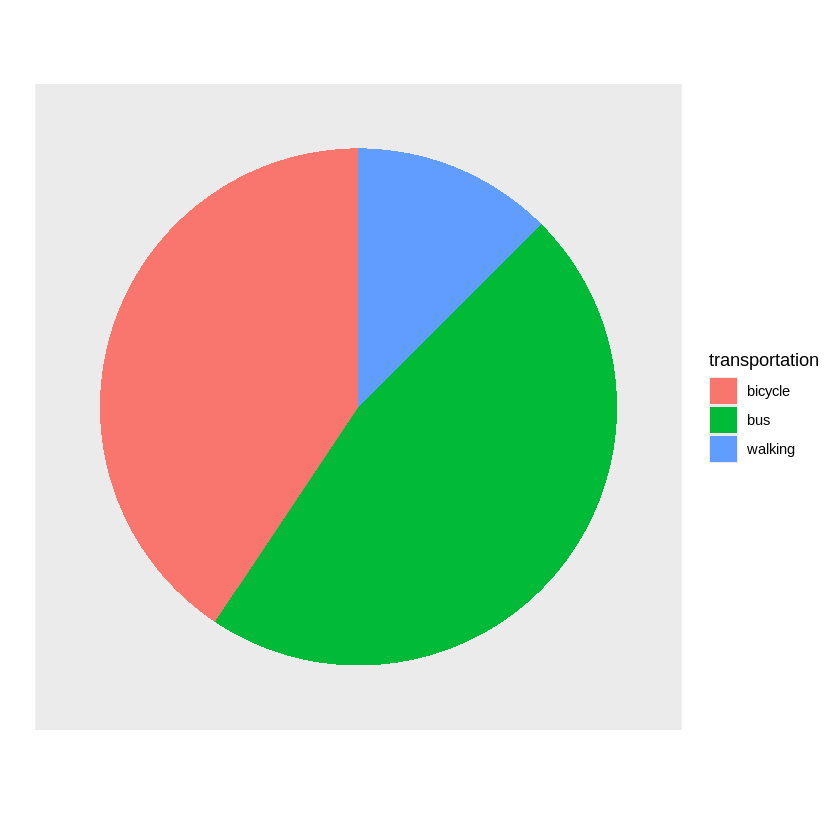

In [17]:
ggplot(data=dat3) + geom_bar(mapping=aes(x='', y=count, fill=transportation),
    stat='identity') +
      coord_polar('y', start=0) + xlab('') + ylab('') +
        theme(axis.text = element_blank(),
              axis.ticks = element_blank(),
              panel.grid = element_blank())